# Vector Data Base - Comparison Research - GenAI POC EY

## Conceptual Definitions

![vector_db_search](vector_db.jpg)

In traditional databases, we are usually querying for rows in the database where the value usually exactly matches our query. In vector databases, we apply a similarity metric to find a vector that is the most similar to our query. A vector database uses a combination of different algorithms that all participate in Approximate Nearest Neighbor (ANN) search. These algorithms optimize the search through hashing, quantization, graph-based search, etc. These algorithms are assembled into a pipeline that provides fast and accurate retrieval of the neighbors of a queried vector. Since the vector database provides approximate results, the main trade-offs we consider are between accuracy and speed. The more accurate the result, the slower the query will be. However, a good system can provide ultra-fast search with near-perfect accuracy.

- **Algorithms**   

Several algorithms can facilitate the creation of a vector index. Their common goal is to enable fast querying by creating a data structure that can be traversed quickly. They will commonly transform the representation of the original vector into a compressed form to optimize the query process.   
  
*Hierarchical Navigable Small World (HNSW):* HNSW creates a hierarchical, tree-like structure where each node of the tree represents a set of vectors. The edges between the nodes represent the similarity between the vectors. The algorithm starts by creating a set of nodes, each with a small number of vectors. This could be done randomly or by clustering the vectors with algorithms like k-means, where each cluster becomes a node. The algorithm then examines the vectors of each node and draws an edge between that node and the nodes that have the most similar vectors to the one it has.

- **Similarity Measures**

Cosine similarity: measures the cosine of the angle between two vectors in a vector space. It ranges from -1 to 1, where 1 represents identical vectors, 0 represents orthogonal vectors, and -1 represents vectors that are diametrically opposed.    
Euclidean distance: measures the straight-line distance between two vectors in a vector space. It ranges from 0 to infinity, where 0 represents identical vectors, and larger values represent increasingly dissimilar vectors.   
Dot product: measures the product of the magnitudes of two vectors and the cosine of the angle between them. It ranges from -∞ to ∞, where a positive value represents vectors that point in the same direction, 0 represents orthogonal vectors, and a negative value represents vectors that point in opposite directions.

- **Filtering**
  
Every vector stored in the database also includes metadata. In addition to the ability to query for similar vectors, vector databases can also filter the results based on a metadata query. To do this, the vector database usually maintains two indexes: a vector index and a metadata index. It then performs the metadata filtering either before or after the vector search itself, but in either case, there are difficulties that cause the query process to slow down.    


- **Performance and Fault tolerance** 
  
Performance and fault tolerance are tightly related. The more data we have, the more nodes that are required - and the bigger chance for errors and failures. As is the case with other types of databases, we want to ensure that queries are executed as quickly as possible even if some of the underlying nodes fail. This could be due to hardware failures, network failures, or other types of technical bugs. This kind of failure could result in downtime or even incorrect query results.

To ensure both high performance and fault tolerance, vector databases use sharding and replication apply the following:
    
Sharding - partitioning the data across multiple nodes. There are different methods for partitioning the data - for example, it can be partitioned by the similarity of different clusters of data so that similar vectors are stored in the same partition. When a query is made, it is sent to all the shards and the results are retrieved and combined. This is called the “scatter-gather” pattern.   
    
Replication - creating multiple copies of the data across different nodes. This ensures that even if a particular node fails, other nodes will be able to replace it. There are two main consistency models: eventual consistency and strong consistency. Eventual consistency allows for temporary inconsistencies between different copies of the data which will improve availability and reduce latency but may result in conflicts and even data loss. On the other hand, strong consistency requires that all copies of the data are updated before a write operation is considered complete. This approach provides stronger consistency but may result in higher latency.

- **Monitoring**

To effectively manage and maintain a vector database, we need a robust monitoring system that tracks the important aspects of the database’s performance, health, and overall status. Monitoring is critical for detecting potential problems, optimizing performance, and ensuring smooth production operations.   

- **Acces Control**

Access control is the process of managing and regulating user access to data and resources. It is a vital component of data security, ensuring that only authorized users have the ability to view, modify, or interact with sensitive data stored within the vector database.     

- **Backups and collections**
  
When all else fails, vector databases offer the ability to rely on regularly created backups. These backups can be stored on external storage systems or cloud-based storage services, ensuring the safety and recoverability of the data. In case of data loss or corruption, these backups can be used to restore the database to a previous state, minimizing downtime and impact on the overall system.

- **API and SDKs**
  
This is where the rubber meets the road: Developers who interact with the database want to do so with an easy-to-use API, using a toolset that is familiar and comfortable. By providing a user-friendly interface, the vector database API layer simplifies the development of high-performance vector search applications.

In addition to the API, vector databases would often provide programming language specific SDKs that wrap the API. The SDKs make it even easier for developers to interact with the database in their applications. 

## Factors for assessing vector databases for production use

1. **Latency and throughput**:      
Measure the response time (latency) and the rate of processing queries (throughput) to evaluate the speed and efficiency of vector retrieval operations.   
2. **Scalability and data volume**:     
Assess how well the vector database handles increasing data volumes and concurrent user queries without significant performance degradation or resource utilization.    
3. **Query capabilities**:       
Evaluate the vector database’s ability to perform various query operations, such as exact match, range queries, nearest neighbor search, and similarity search, to ensure it meets the requirements of the language model application.      
4. **Integration with existing infrastructure**:    
Consider the ease of integration and compatibility with existing systems, programming languages, and frameworks used in the production environment.    


## Comparing selected databases based on different factors ([source](https://benchmark.vectorview.ai/vectordbs.html)):

| Factors                                                    | Pinecone                                   | Weaviate                  | Milvus                           | Qdrant                         | Chroma                         | Elasticsearch                    | PGvector        |
|------------------------------------------------------------|--------------------------------------------|---------------------------|----------------------------------|--------------------------------|--------------------------------|-----------------------------------|-----------------|
| Is open source                                             | ❌                                          | ✅                         | ✅                                | ✅                              | ✅                              | ❌                                 | ✅               |
| Self-host                                                  | ❌                                          | ✅                         | ✅                                | ✅                              | ✅                              | ✅                                 | ✅               |
| Cloud management                                           | ✅                                          | ✅                         | ✅                                | ✅                              | ❌                              | ✅                                 | (✔️)            |
| Purpose-built for Vectors                                  | ✅                                          | ✅                         | ✅                                | ✅                              | ✅                              | ❌                                 | ❌               |
| Community                                                  | Community page & events                     | 8k☆ github, 4k slack      | 23k☆ github, 4k slack            | 13k☆ github, 3k discord        | 9k☆ github, 6k discord          | 23k slack                         | 6k☆ github      |
| Queries per second (using text nytimes-256-angular)        | 150 *for p2, but more pods can be added     | 791                       | 2406                             | 326                            | ?                               | 700-100 *from various reports     | 141             |
| Latency, ms (Recall/Percentile 95 (millis), nytimes-256-angular) | 1 *batched search, 0.99 recall, 200k SBERT | 2                         | 1                                | 4                              | ?                               | ?                                 | 8               |
| Supported index types                                      | ?                                          | HNSW                       | Multiple (11 total)              | HNSW                           | HNSW                            | HNSW                              | HNSW/IVFFlat    |
| Hybrid Search (i.e. scalar filtering)                     | ✅                                          | ✅                         | ✅                                | ✅                              | ✅                              | ✅                                 | ✅               |

## Performance Benchmark ([source](https://ann-benchmarks.com/glove-100-angular_10_angular.html))

ANN-Benchmarks serves as the predominant benchmarking platform for evaluating the performance of approximate nearest neighbor algorithm searches. In text retrieval, the performance of a vector database on angular metrics is often more important than its performance on Euclidean metrics. This is because angular metrics are more sensitive to the semantic similarity of text documents, while Euclidean metrics are more sensitive to the length and scale of the documents. Consequently, when considering our context of retrieval augmented generation, it becomes imperative to assess the performance of vector databases across angular datasets that span varying dimensions.

The image shows: Milvus (green), Weaviate (brown), qdrant (yellow), Pgvector (purpple). 

### ANN-Benchmark : Plots for glove-100-angular (k = 10)

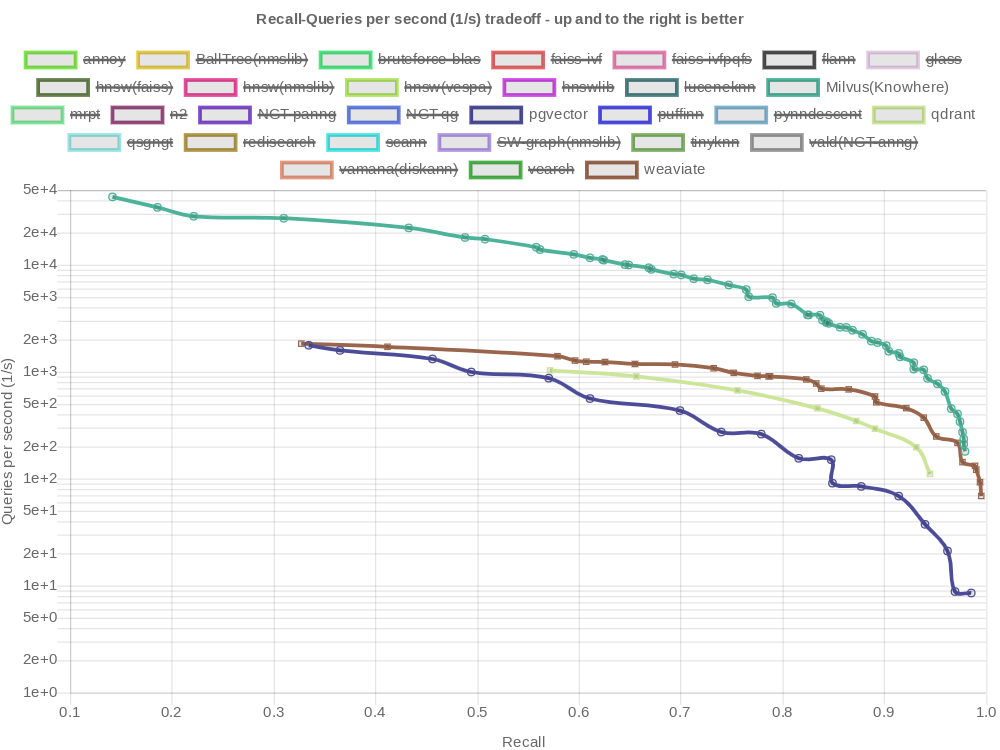

### Qdrant Benchmark

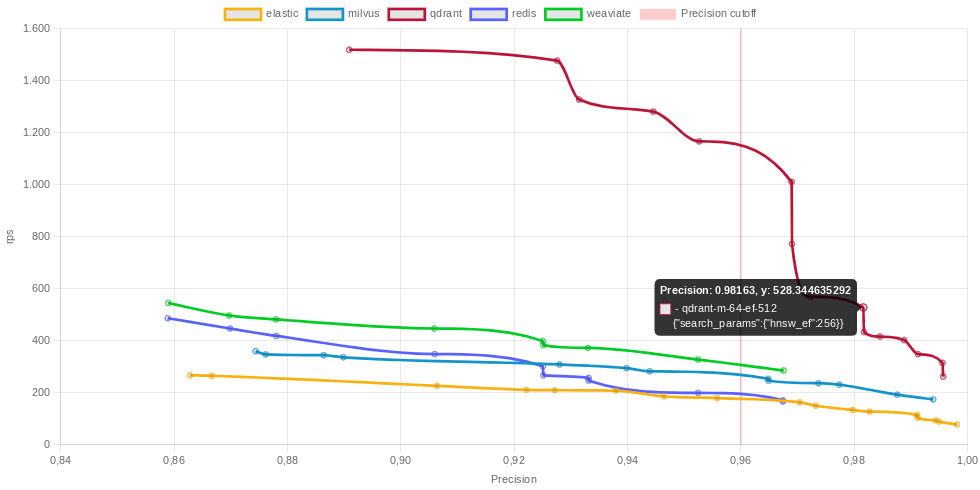

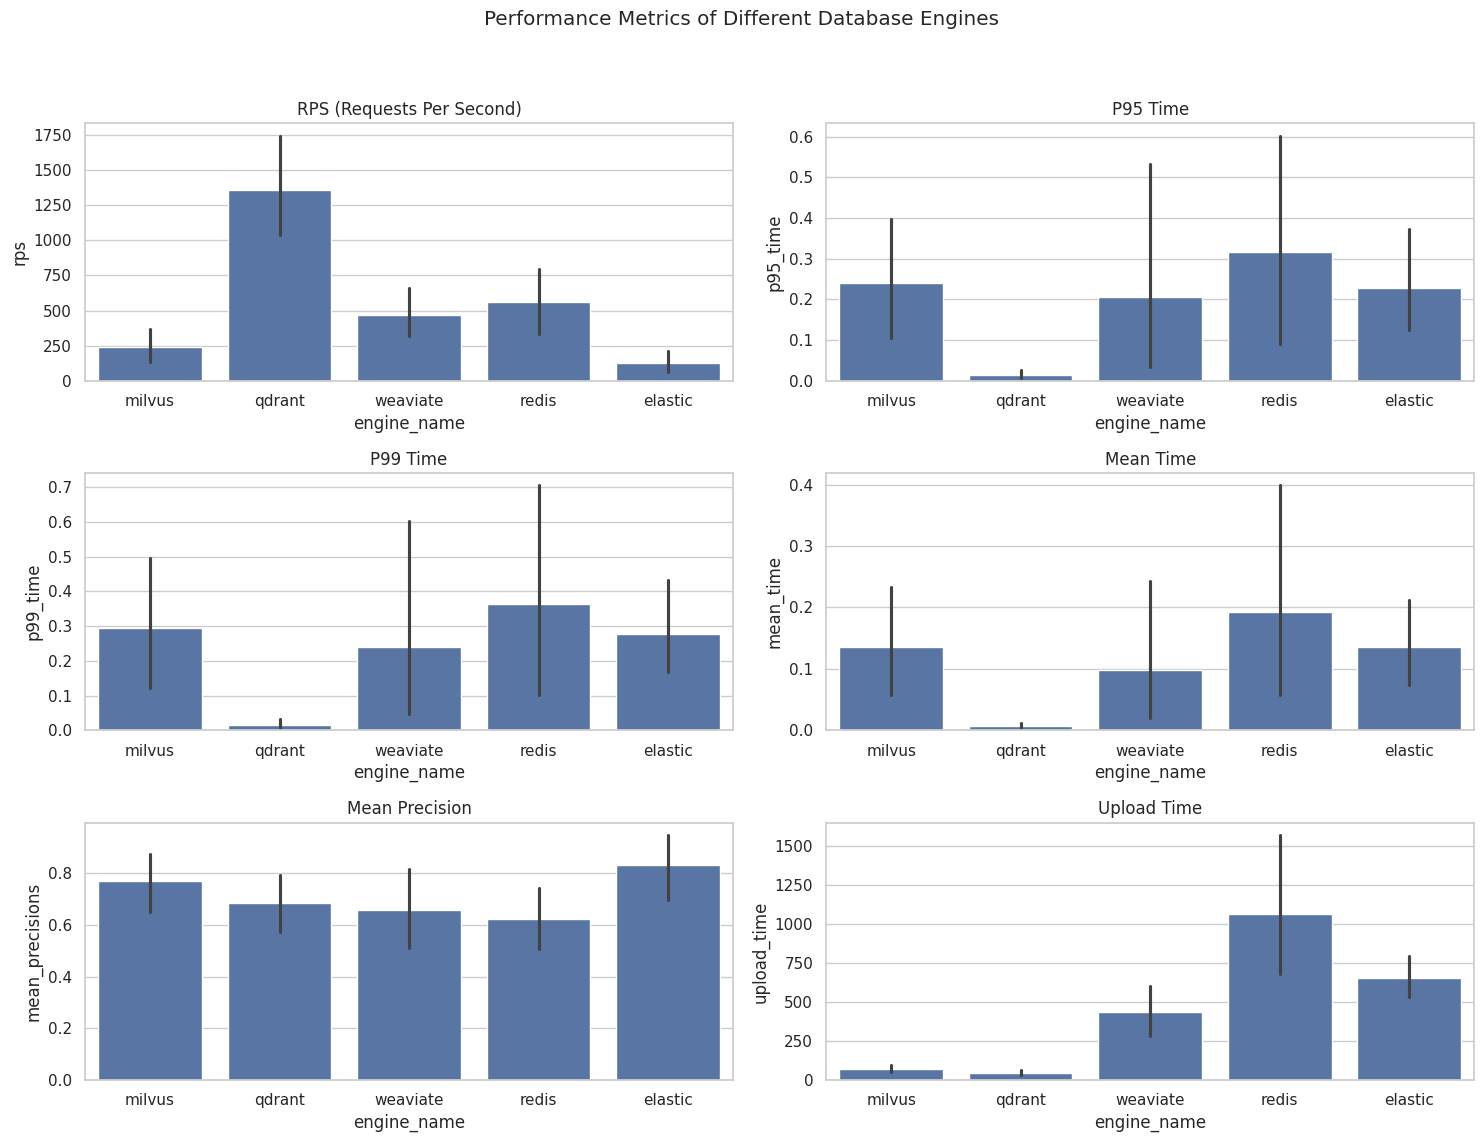

In [8]:
# Qdran Results
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt

f = open('filter-result-2023-02-03.json') 
data = json.load(f)
df = pd.DataFrame(data)

# Plotting
sns.set(style="whitegrid")

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Performance Metrics of Different Database Engines')

# RPS (Requests Per Second)
sns.barplot(x='engine_name', y='rps', data=df, ax=axes[0, 0])
axes[0, 0].set_title('RPS (Requests Per Second)')

# P95 Time
sns.barplot(x='engine_name', y='p95_time', data=df, ax=axes[0, 1])
axes[0, 1].set_title('P95 Time')

# P99 Time
sns.barplot(x='engine_name', y='p99_time', data=df, ax=axes[1, 0])
axes[1, 0].set_title('P99 Time')

# Mean Time
sns.barplot(x='engine_name', y='mean_time', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Mean Time')

# Mean Precision
sns.barplot(x='engine_name', y='mean_precisions', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Mean Precision')

# Upload Time
sns.barplot(x='engine_name', y='upload_time', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Upload Time')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Pros and Cons ([source](https://thedataquarry.com/posts/vector-db-1/))

**Pinecone**  

Pros: Very easy to get up and running (no hosting burden, it’s fully cloud-native), and doesn’t expect the user to know anything about vectorization or vector indexes. As per their documentation (which is also quite good), it just works.
Cons: Fully proprietary, and it’s impossible to know what goes on under the hood and what’s on their roadmap without being able to follow their progress on GitHub. 

**Weaviate**

Pros: Amazing documentation (one of the best out there, including technical details and ongoing experiments). Weaviate really seems to be focused on building the best developer experience possible, and it’s very easy to get up and running via Docker. In terms of querying, it produces fast, sub-millisecond search results, while offering both keyword and vector search functionality.    

Cons: Because Weaviate built in Golang, scalability is achieved through Kubernetes, and this approach (in a similar way to Milvus) is known require a fair amount of infrastructure resources when the data gets really large. The cost implications for Weaviate’s fully-managed offering over the long term are unknown, and it may make sense to compare its performance with other Rust-based alternatives like Qdrant and LanceDB (though time will tell which approach scales better in the most cost-effective manner).  

**Qdrant**   

Pros: Although newer than Weaviate, Qdrant also has great documentation that helps developers get up and running via Docker with ease. Built entirely in Rust, it offers APIs that developers can tap into via its Rust, Python and Golang clients, which are the most popular languages for backend devs these days. Due to the underlying power of Rust, its resource utilization seems lower than alternatives built in Golang (at least in my experience). Scalability is currently achieved through partitioning and the Raft consensus protocol, which are standard practices in the database space.   

Cons: Being a relatively newer tool than its competitors, Qdrant has been playing catch-up with alternatives like Weaviate and Milvus, in areas like user interfaces for querying, though that gap is rapidly reducing with each new release.   

**Milvus/Zilliz**

Pros: Very mature database with a host of algorithms, due to its lengthy presence in the vector DB ecosystem. Offers a lot of options for vector indexing and built from the ground up in Golang to be extremely scalable. As of 2023, it’s the only major vendor to offer a working DiskANN implementation, which is said to be the most efficient on-disk vector index.

Cons: To my eyes, Milvus seems to be a solution that throws the kitchen sink and the refrigerator at the scalability problem – it achieves a high degree of scalability through a combination of proxies, load balancers, message brokers, Kafka and Kubernetes, which makes the overall system really complex and resource-intensive. The client APIs (e.g., Python) are also not as readable or intuitive as newer databases like Weaviate and Qdrant, who tend to focus a lot more on developer experience.

**Chroma**

Pros: Offers a convenient Python/JavaScript interface for developers to quickly get a vector store up and running. It was the first vector database in the market to offer embedded mode by default, where the database and application layers are tightly integrated, allowing developers to quickly build, prototype and showcase their projects to the world.  

Cons: Unlike the other purpose-built vendors, Chroma is largely a Python/TypeScript wrapper around an existing OLAP database (Clickhouse), and an existing open source vector search implementation (hnswlib). For now (as of June 2023), it doesn’t implement its own storage layer.  


# Conclusion 

Due to their performance, features, active development, and open-source nature, and considering our use-case for RAGbot:

- [Weaviate](https://weaviate.io/) (Golang)
- [Milvus](https://milvus.io/) (Golang)
- [Qdrant](https://qdrant.tech/) (Rust)

The selection of Weaviate, Milvus, and Qdrant aligns with the need for high performance and feature-rich solutions. Their active development and open-source nature are advantageous for long-term support and community-driven improvements.Weaviate's semantic search capabilities and Milvus's flexibility with multiple index types can be particularly beneficial for a Retrieval-Augmented Generation model, which relies heavily on effective and efficient data retrieval. Qdrant's performance metrics and features make it a strong contender, especially if we look for efficient vector search and good scalability.

Additional factors  for a more holistic comparison:

- Distribution capabilities and sharding mechanisms: this factor will affect how the database scales and handles large datasets, which is important for a RAGbot dealing with extensive data.
- Clustering approaches and scalability: this factor will determine how well the database can grow with the application and handle increased loads without a significant drop in performance.
- Data consistency and overall system availability: critical for ensuring the reliability and robustness of the solution in a production environment.

### Bib and resources
- [What is a Vector Database & How Does it Work? Use Cases + Examples](https://www.pinecone.io/learn/vector-database/)
- [Optimizing RAG: A Guide to Choosing the Right Vector Database](https://medium.com/@mutahar789/optimizing-rag-a-guide-to-choosing-the-right-vector-database-480f71a33139)
- [VectorDB Feature Matrix](https://docs.google.com/spreadsheets/d/170HErOyOkLDjQfy3TJ6a3XXXM1rHvw_779Sit-KT7uc/edit#gid=0) 
- [Prashanth Rao, 'On_VDB'](https://thedataquarry.com/tags/vector-db/), fundamentally [Post1](https://thedataquarry.com/posts/vector-db-4/) and [Post4](https://thedataquarry.com/posts/vector-db-4/),  
- [Christoph Bussler](https://medium.com/google-cloud/vector-databases-are-all-the-rage-872c888fa348)